# This is LSTM model

In [13]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from matplotlib.pyplot import figure
import keras;
import tensorflow as tf;
from keras.preprocessing.sequence import TimeseriesGenerator;
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go
from sklearn.metrics import r2_score


In [14]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data into a pandas DataFrame
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.set_index("Date", inplace=True)

# Prepare the data for the LSTM model
window_size = 7
X = []
y = []
for i in range(window_size, len(data)):
    X.append(data.iloc[i-window_size:i, 0])
    y.append(data.iloc[i, 0])
X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation="relu", return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(50, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test, verbose=0)
print("MSE: %.2f" % mse)

# Use the model to forecast future prices
forecast = []
last_window = X[-1]
while len(forecast) < 30:
    pred = model.predict(np.reshape(last_window, (1, window_size, 1)))
    forecast.append(pred[0][0])
    last_window = np.concatenate((last_window[1:], np.array([pred[0]])))

# Print the forecasted prices
print("Forecasted prices:")
for i, price in enumerate(forecast):
    date = pd.to_datetime(data.index[-1]) + pd.Timedelta(days=i+1)
    print("%s\t%.2f" % (date.strftime("%Y-%m-%d"), price))
    


C:\Users\emili\AppData\Local\Temp\ipykernel_28600\2388450408.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")


MSE: 54.71
1/1 [==============================] - 0s 23ms/step
Forecasted prices:
2024-01-05	234.35
2024-01-06	232.93
2024-01-07	232.68
2024-01-08	231.30
2024-01-09	231.77
2024-01-10	235.71
2024-01-11	242.40
2024-01-12	247.49
2024-01-13	249.80
2024-01-14	251.59
2024-01-15	254.07
2024-01-16	257.56
2024-01-17	261.53
2024-01-18	265.23
2024-01-19	268.44
2024-01-20	271.37
2024-01-21	274.22
2024-01-22	276.99
2024-01-23	279.54
2024-01-24	281.68
2024-01-25	283.33
2024-01-26	284.48
2024-01-27	285.18
2024-01-28	285.49
2024-01-29	285.44
2024-01-30	285.00
2024-01-31	284.08
2024-02-01	282.59
2024-02-02	280.46
2024-02-03	277.59


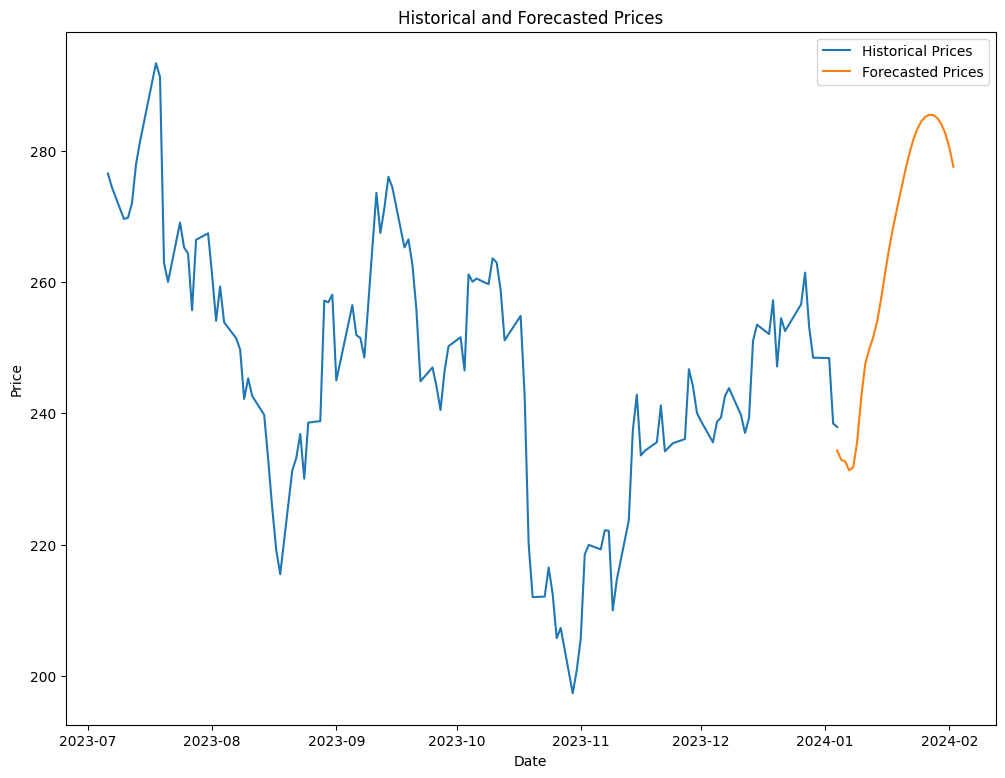

In [15]:
import matplotlib.pyplot as plt;
plt.figure(figsize = (12,9));
dates = pd.date_range(start=data.index[-1], periods=30, freq="D")
plt.plot(data.index, data["Close"], label="Historical Prices")
plt.plot(dates, forecast, label="Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Historical and Forecasted Prices")
plt.legend()
plt.show()

## This is ARIMA the first one is with the adjusted parameters and smoothed data while the second one is just ARIMA with our regular data and regular parameters

C:\Users\emili\AppData\Local\Temp\ipykernel_28600\1278596870.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\emili\AppData\Local\Temp\ipykernel_28600\1278596870.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Pr

ARIMA(0, 0, 0) failed to converge
ARIMA(0, 0, 1) failed to converge


c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

ARIMA(0, 0, 2) failed to converge
ARIMA(0, 1, 0) failed to converge
ARIMA(0, 1, 1) failed to converge
ARIMA(0, 1, 2) failed to converge
ARIMA(1, 0, 0) failed to converge
ARIMA(1, 0, 1) failed to converge


c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

ARIMA(1, 0, 2) failed to converge
ARIMA(1, 1, 0) failed to converge
ARIMA(1, 1, 1) failed to converge
ARIMA(1, 1, 2) failed to converge
ARIMA(2, 0, 0) failed to converge
ARIMA(2, 0, 1) failed to converge
ARIMA(2, 0, 2) failed to converge
ARIMA(2, 1, 0) failed to converge
ARIMA(2, 1, 1) failed to converge
ARIMA(2, 1, 2) failed to converge


c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

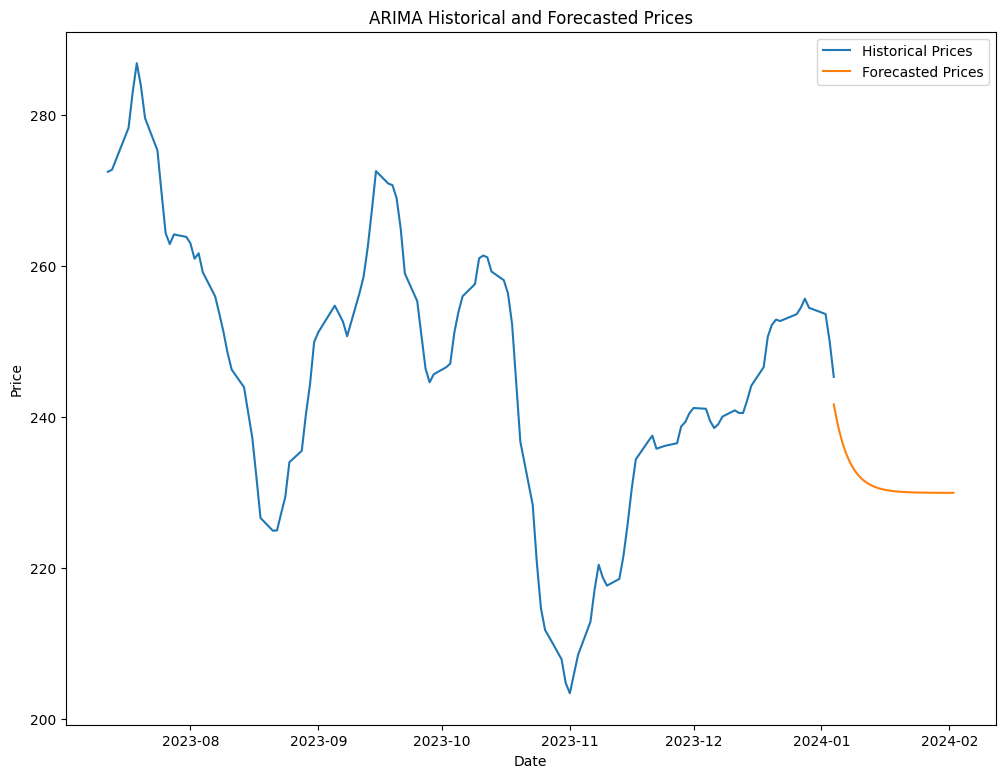

In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product

# load the data into a pandas DataFrame
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data["Close"] = pd.Series(data['Close']).rolling(window=5).mean()
data.set_index("Date", inplace=True)

# split the data into a training and validation set

# split the data into a training and validation set
train_size = int(len(data) * 0.8)
train, valid = data[:train_size], data[train_size:]

# try different values of p, d, and q until a valid model is found
for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                # fit an ARIMA model with the current values of p, d, and q
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                # generate a forecast using the validation set
                forecast = model_fit.forecast(steps=len(valid))[0]
                # evaluate the forecast using mean squared error
                score = mean_squared_error(valid, forecast)
                print(f"ARIMA({p}, {d}, {q}) MSE = {score:.2f}")
            except:
                # if the model fails to converge, print an error message
                print(f"ARIMA({p}, {d}, {q}) failed to converge")

# fit the best model on the full dataset and generate a forecast
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# plot the original data and the forecast
plt.figure(figsize = (12,9));
dates = pd.date_range(start=data.index[-1], periods=30, freq="D")
plt.plot(data.index, data["Close"], label="Historical Prices")
plt.plot(dates, forecast, label="Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ARIMA Historical and Forecasted Prices")
plt.legend()
plt.show()

In [59]:
dates = pd.date_range(start=data.index[-1], periods=30, freq="D")

# Create a plot with both historical and forecasted data
fig = go.Figure()

# Add historical prices to the plot
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Historical Prices'))

# Add forecasted prices to the plot
fig.add_trace(go.Scatter(x=dates, y=forecast, mode='lines', name='Forecasted Prices'))

# Update plot layout
fig.update_layout(title='ARIMA Historical and Forecasted Prices',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  legend_title='Legend',
                  height=800)

# Show the plot
fig.show()

In [12]:
data

,Date,Close
3275,2023-07-06,276.540009
3276,2023-07-07,274.429993
3277,2023-07-10,269.609985
3278,2023-07-11,269.790009
3279,2023-07-12,271.989990
...,...,...
3397,2023-12-28,253.179993
3398,2023-12-29,248.479996
3399,2024-01-02,248.419998
3400,2024-01-03,238.449997


In [11]:
data_OG.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/9a/b2/13833f94076dcc2709137fee92157ef5a0099a11ddff4f4b7cb301b35357/statsmodels-0.14.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
    --------------------------------------- 0.2/9.9 MB 5.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.9 MB 13.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.9 MB 18.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.7/9.9 MB 21.4 MB/s eta 0:00:01
   -------------------- ------------------- 4.9/9.9 MB 22.5 MB/s eta 0:00:01
   -------------------------- ------------- 6.5/9.9 MB 24.4 MB/s eta 0:00:01
   --------------------------------- ------ 8.2


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\emili\AppData\Local\Temp\ipykernel_28600\399380671.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date ind

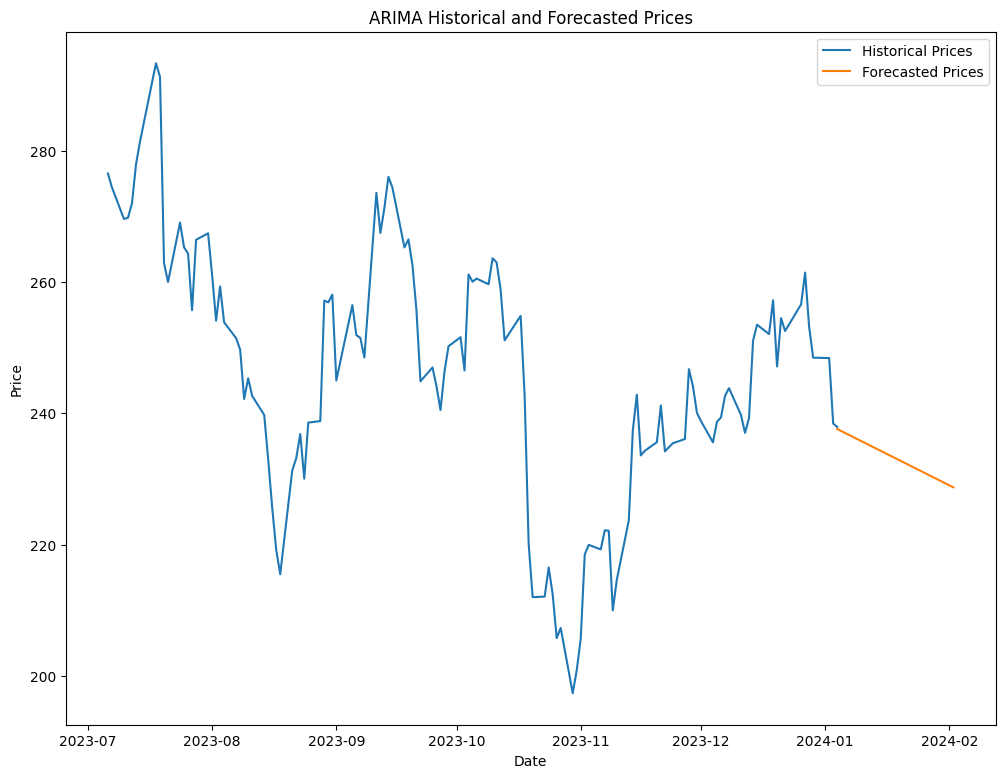

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

# fit an ARIMA model to the data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.set_index("Date", inplace=True)

model = ARIMA(data, order=(1, 2, 1))
model_fit = model.fit()

# generate forecasts for the next 30 days
forecast = model_fit.forecast(steps=30)

# plot the original data and the forecast
plt.figure(figsize = (12,9));
plt.plot(data.index, data["Close"], label="Historical Prices")
plt.plot(dates, forecast, label="Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ARIMA Historical and Forecasted Prices")
plt.legend()
plt.show()

### This is with Random Forest Regression

C:\Users\emili\AppData\Local\Temp\ipykernel_28600\908282498.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[238.84199887 238.84738663 239.06214405 239.5141346  239.75097588
 240.01336607 239.95917051 240.30337017 240.52046894 240.52513634
 240.4947171  240.45862001 240.45862001 240.46078501 240.4620717
 240.4620717  240.4620717  240.4620717  240.4620717  240.4620717
 240.4620717  240.4620717  240.4620717  240.4620717  240.4620717
 240.4620717  240.4620717  240.4620717  240.4620717  240.4620717 ]


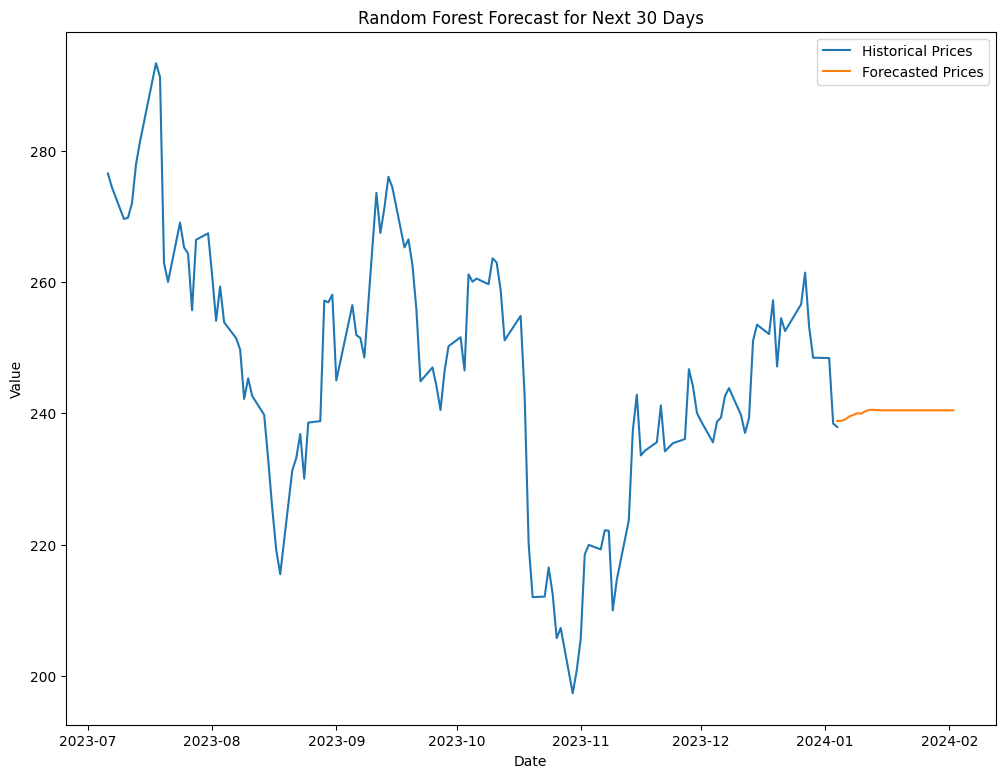

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# load the data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data1 = data
df = data

# extract the date and target columns
dates = df['Date'].values
target = df['Close'].values

# define the number of days to forecast
n_forecast = 30

# create a lagged dataset for regression
lags = 7
X = np.zeros((len(target)-lags, lags))
y = np.zeros((len(target)-lags, ))
for i in range(lags, len(target)):
    X[i-lags, :] = target[i-lags:i]
    y[i-lags] = target[i]

# split the dataset into training and testing sets
n_train = int(0.8*len(X))
X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test = X[n_train:], y[n_train:]

# create and fit the random forest regressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# make predictions for the next n_forecast days
forecast = np.zeros((n_forecast, ))
for i in range(n_forecast):
    last_week = target[-lags:]
    pred = rf.predict(last_week.reshape(1, -1))[0]
    target = np.append(target, pred)
    forecast[i] = pred

# print the forecast
print(forecast)

# Plot the actual data
plt.figure(figsize = (12,9));
data1.set_index("Date", inplace=True)
plt.plot(data.index, data["Close"], label="Historical Prices")

# Plot the forecast
dates = pd.date_range(start=data1.index[-1], periods=30, freq="D")
plt.plot(dates, forecast, label="Forecasted Prices")

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Value')

# Set the title
plt.title('Random Forest Forecast for Next 30 Days')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [20]:
last_date = data1.index.max()
forecast_dates = pd.date_range(start=last_date, periods=len(forecast) + 1, freq='D')[1:]

# Plotting
fig = go.Figure()

# Add actual data to the plot
fig.add_trace(go.Scatter(x=data1.index, y=data1['Close'], mode='lines', name='Historical Prices'))

# Add forecasted data to the plot
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast, mode='lines', name='Forecasted Prices'))

# Update plot layout
fig.update_layout(title='Random Forest Forecast for Next 30 Days',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  legend_title='Legend')

# Show the plot
fig.show()

In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go

# Load the data
file_path = r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv'
data = pd.read_csv(file_path)
data = data.tail(127)

# Convert 'Date' to datetime and sort by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Feature Engineering: Creating lag features to capture temporal relationships
data['Previous_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)  # Drop the first row that now contains NaN

# Split the dataset into training part and keep the last part for forecasting
X = data[['Previous_Close']]
y = data['Close']

# Using all available data for training since we want to forecast future unseen data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Forecasting the next 30 days
last_known_price = data['Close'].iloc[-1]
forecast = []
current_feature = last_known_price

for _ in range(30):
    # Predict the next day
    next_day_prediction = model.predict([[current_feature]])
    forecast.append(next_day_prediction[0])
    # Use the prediction as the feature for the next prediction
    current_feature = next_day_prediction[0]

# Creating a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Close': forecast})

# Visualizing the predictions along with the actual data
fig = go.Figure()

# Actual data plot
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Actual Close'))

# Forecasted data plot
fig.add_trace(go.Scatter(x=forecast_df['Date'], y=forecast_df['Forecasted_Close'], mode='lines', name='Forecasted Close'))

# Update layout
fig.update_layout(
    title="Random Forest Regression 30-Day Forecast",
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    height=800
)

fig.show()


c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with featu

#### Cant get he Gradient Boosting Regressor to work because of problems with Pandas

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# load the data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.set_index("Date", inplace=True)
df = data.resample('D').ffill()

# create the training and testing datasets
train1 = df[:-30]
train = df[:-30].values
#train = train.reset_index(drop=True)
test = df[-30:]

# split the data into features (X) and target (y)
X_train, y_train = train1.drop('Close', axis=1), train
X_test, y_test = test.drop('Close', axis=1), test['Close']

# create the Gradient Boosting model and fit the training data
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=42)
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


C:\Users\emili\AppData\Local\Temp\ipykernel_28600\205014472.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: at least one array or dtype is required

In [22]:
def pred(df):
    close_data = df['Close'].values
    close_data = close_data.reshape((-1,1));

    split_percent = 0.80;
    split = int(split_percent*len(close_data));

    close_train = close_data[:split];
    close_test = close_data[split:];

    date_train = df.index[:split];
    date_test = df.index[split:];

    #print(len(close_train));
    #print(len(close_test));
    ## You should get that the train and testing sets have been split 
    ## into 80% train and 20% test

    look_back = 5;

    train_generator = TimeseriesGenerator(close_train, close_train, length = look_back, batch_size = 200);
    test_generator = TimeseriesGenerator(close_test, close_test, length = look_back, batch_size = 200);

    model = Sequential()
    model.add(
        LSTM(30,
            activation='LeakyReLU',
            input_shape=(look_back,1))
    )
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    num_epochs = 100;
    model.fit(train_generator, epochs=num_epochs, verbose=1)
    prediction = model.predict(test_generator)

    close_train = close_train.reshape((-1))
    close_test = close_test.reshape((-1))
    prediction = prediction.reshape((-1))

    close_data = close_data.reshape((-1));

    def predict(num_prediction, model):
        prediction_list = close_data[-look_back:];
    
        for _ in range(num_prediction):
            x = prediction_list[-look_back:];
            x = x.reshape((1, look_back, 1));
            out = model.predict(x)[0][0];
            prediction_list = np.append(prediction_list, out);
        prediction_list = prediction_list[look_back-1:];
        
        return prediction_list;
    
    def predict_dates(num_prediction):
        last_date = df.index.values[-1];
        prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist();
        return prediction_dates;

    num_prediction = 5;
    forecast = predict(num_prediction, model);
    forecast_dates = predict_dates(num_prediction);
    trace3 = go.Scatter(
        x = date_test,
        y = close_test,
        mode='lines',
        name = 'Historical Prices'
    )
    layout = go.Layout(
        title = ("Stock's Historical and Forecasted Prices"),
        font = dict(size = 20),
        width=500,
        height=500,
        xaxis = {'title' : "Date"},
        yaxis = {'title' : "Close"}
    )
    #test_r2_score = r2_score(close_test[0:len(close_test)-look_back],prediction)
    #print("The R2_score of this Training-Testing model is:",test_r2_score)
    trace1 = go.Scatter(
        x = forecast_dates,
        y = forecast,
        mode = 'lines',
        name = 'Forecasted Prices'
    )
    layout = go.Layout(
        title = ("Stock"),
        font = dict(size = 20),
        xaxis = {'title' : "Date"},
        yaxis = {'title' : "Prices"}
    )
    fig = go.Figure(data=[trace3, trace1], layout=layout);
    fig.show()
    #df_r2_score = r2_score(df_comp['Close'], forecast)
    #print("The R2_score of this prediction model is:",df_r2_score)

In [23]:
pred(data)

Epoch 1/100
1/1 [==============================] - 1s 934ms/step - loss: 57709.3867
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 56826.0977
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 55910.3750
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 54856.1445
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 53603.4688
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 51938.3438
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 49522.7930
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 46368.6250
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 43289.1602
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 40942.4727
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - loss: 39054.1602
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 37347.3828


##### This is using Support Vector Machines

C:\Users\emili\AppData\Local\Temp\ipykernel_28600\3853805862.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



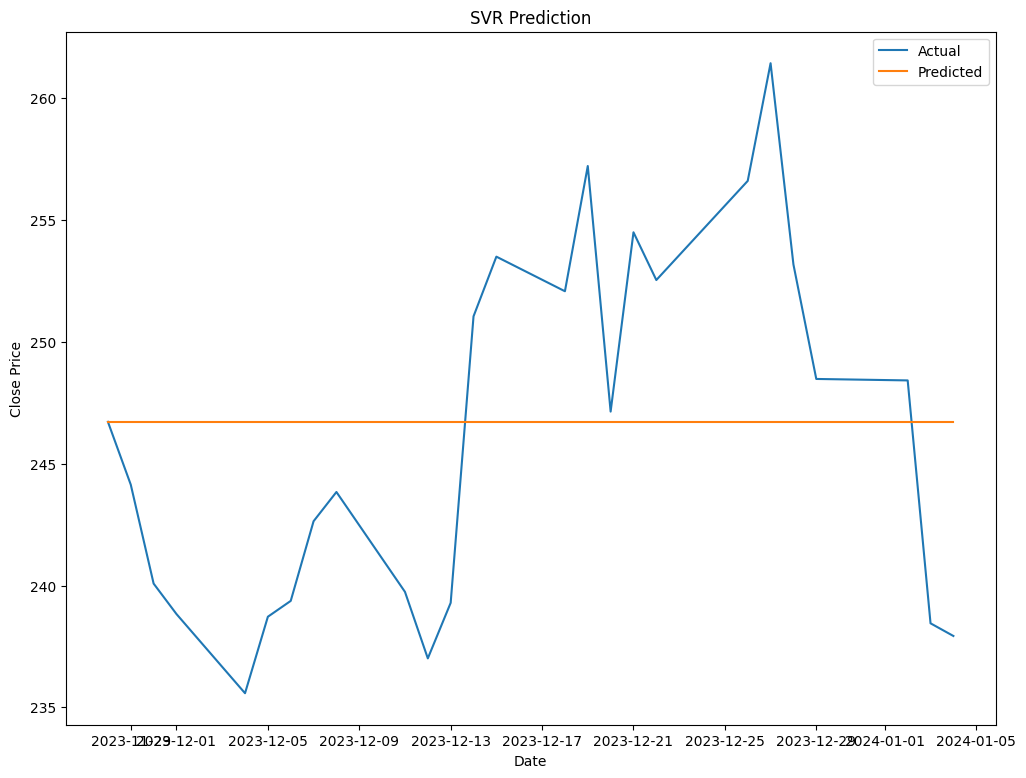

In [24]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# load data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.set_index("Date", inplace=True)
data1 = data
df = data

# create a numpy array for dates and close prices
dates = np.array(df.index).reshape(-1, 1)
close_prices = np.array(df['Close'])

# split data into training and testing sets
split = int(len(df) * 0.8)
train_dates = dates[:split]
train_prices = close_prices[:split]
test_dates = dates[split:]
test_prices = close_prices[split:]

# create and fit SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(train_dates, train_prices)

# make predictions for the test set
predictions = svr_rbf.predict(test_dates)

plt.figure(figsize = (12,9))
# plot the actual prices and predicted prices
plt.plot(test_dates, test_prices, label='Actual')
plt.plot(test_dates, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SVR Prediction')
plt.legend()
plt.show()

# # forecast the next 30 days
# last_date = dates[-1]
# forecast_dates = pd.date_range(last_date, periods=30).values.reshape(-1, 1)
# forecast_prices = svr_rbf.predict(forecast_dates)

# # plot the forecasted prices
# plt.plot(forecast_dates, forecast_prices, label='Forecasted')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.title('SVR Forecast')
# plt.legend()
# plt.show()


#### This is using SARIMAX

In [45]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\emili\AppData\Local\Temp\ipykernel_28600\2544785909.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No suppor

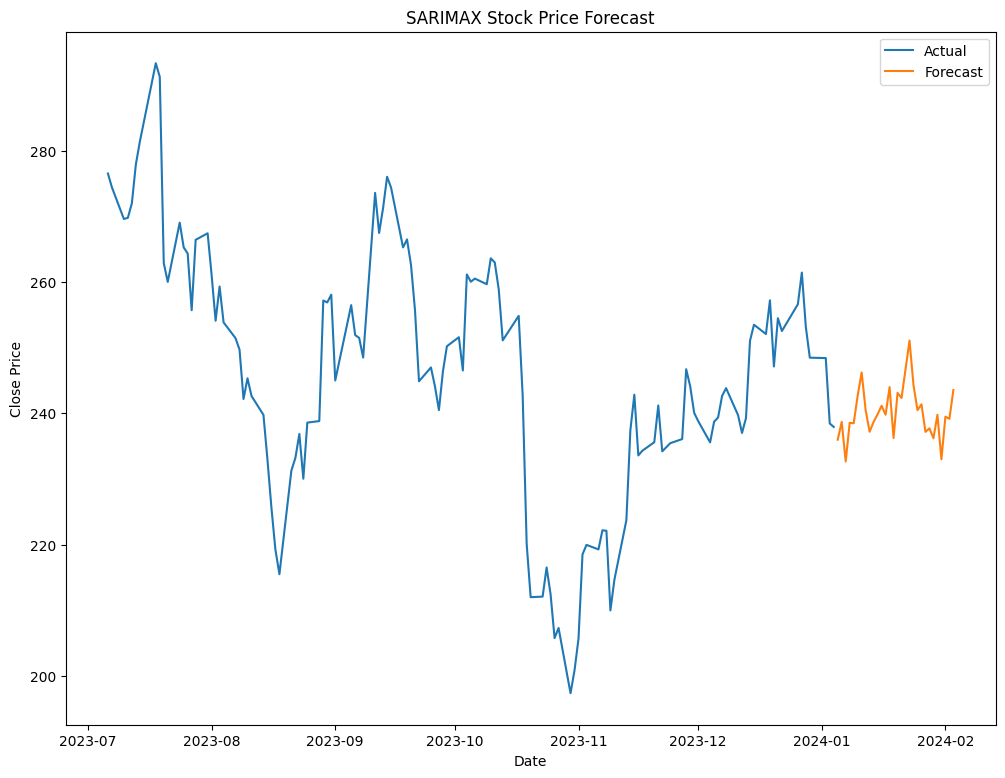

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Load data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.set_index("Date", inplace=True)
data1 = data
df = data

# Convert Date column to datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Set Date column as index
#df.set_index('Date', inplace=True)
model = SARIMAX(data['Close'], order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
results = model.fit()

# make predictions for the next 30 days
forecast = results.predict(start=len(data), end=len(data)+29)

# create a datetime index for the forecast period
forecast_dates = pd.date_range(start=data.index[-1], periods=30+1, freq='D')[1:]

# combine the original data and the forecast data
combined = pd.concat([data, pd.DataFrame({'Close': forecast}, index=forecast_dates)])

# plot the results
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(combined.index, combined['Close'], label='Actual')
ax.plot(forecast_dates, forecast, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('SARIMAX Stock Price Forecast')
ax.legend()
plt.show()


In [60]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go

# Load data
data_OG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data_OG = data_OG.drop(labels=range(0, len(data_OG.index)-127), axis=0)
data = data_OG[['Date','Close']]
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.set_index("Date", inplace=True)

# Model fitting
model = SARIMAX(data['Close'], order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
results = model.fit()

# Make predictions for the next 30 days
forecast = results.predict(start=len(data), end=len(data)+29)

# Create a datetime index for the forecast period
forecast_dates = pd.date_range(start=data.index[-1], periods=30+1, freq='D')[1:]

# Combine the original data and the forecast data
combined = pd.concat([data, pd.DataFrame({'Close': forecast}, index=forecast_dates)])

# Plotting with Plotly
fig = go.Figure()

# Actual data plot
fig.add_trace(go.Scatter(x=combined.index, y=combined['Close'], mode='lines', name='Actual'))

# Forecast data plot
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast, mode='lines', name='Forecast'))

# Layout updates
fig.update_layout(
    title='SARIMAX 30-Day Tesla Stock Price Forecast',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    height=800
)

fig.show()


C:\Users\emili\AppData\Local\Temp\ipykernel_28600\3696849372.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No suppor

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv'
data = pd.read_csv(file_path)

# Assuming 'Date' and 'Close' are column names in your CSV file
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Using the last 127 days + 30 days forecast
data = data.tail(127)

# Preparing the data for SVR
dates = np.arange(1, len(data) + 1).reshape(-1, 1)
prices = data['Close'].values.reshape(-1, 1)

# Scaling the data
scaler_dates = StandardScaler()
scaler_prices = StandardScaler()

dates_scaled = scaler_dates.fit_transform(dates)
prices_scaled = scaler_prices.fit_transform(prices)

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(dates_scaled, prices_scaled, test_size=0.2, random_state=42)

# Creating and training the SVR model
svr_rbf = SVR(kernel='rbf', C=1000000, gamma=0.001)
svr_rbf.fit(X_train, y_train.ravel())

# Predicting the next 30 days
future_dates = np.arange(len(dates) + 1, len(dates) + 31).reshape(-1, 1)
future_dates_scaled = scaler_dates.transform(future_dates)
predicted_prices_scaled = svr_rbf.predict(future_dates_scaled)
predicted_prices = scaler_prices.inverse_transform(predicted_prices_scaled.reshape(-1, 1))

# Output the predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Day {i+1}: ${price[0]:.2f}")


Day 1: $248.12
Day 2: $248.46
Day 3: $248.82
Day 4: $249.18
Day 5: $249.55
Day 6: $249.93
Day 7: $250.32
Day 8: $250.72
Day 9: $251.13
Day 10: $251.55
Day 11: $251.98
Day 12: $252.41
Day 13: $252.86
Day 14: $253.31
Day 15: $253.77
Day 16: $254.24
Day 17: $254.72
Day 18: $255.21
Day 19: $255.71
Day 20: $256.22
Day 21: $256.74
Day 22: $257.26
Day 23: $257.80
Day 24: $258.34
Day 25: $258.90
Day 26: $259.46
Day 27: $260.03
Day 28: $260.61
Day 29: $261.20
Day 30: $261.80


In [63]:
import plotly.graph_objects as go

# Create a scatter plot for the actual prices
actual_prices = go.Scatter(
    x=data['Date'],
    y=data['Close'],
    mode='lines',
    name='Actual Price'
)

# Prepare dates for the predicted prices for plotting
future_dates_all = pd.date_range(start=data['Date'].iloc[-1], periods=31)[1:]  # Starts the day after the last day in data
predicted_prices_df = pd.DataFrame({'Date': future_dates_all, 'Predicted Price': predicted_prices.flatten()})

# Create a scatter plot for the predicted prices
predicted_prices_plot = go.Scatter(
    x=predicted_prices_df['Date'],
    y=predicted_prices_df['Predicted Price'],
    mode='lines',
    name='Predicted Price'
)

# Combine the plots
fig = go.Figure(data=[actual_prices, predicted_prices_plot])

# Add titles and labels
fig.update_layout(
    title='SVR Tesla Stock 30-Day Price Prediction',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    legend_title='Legend',
    height=800
)

# Show the plot
fig.show()


#### Simple exponential Smoothing

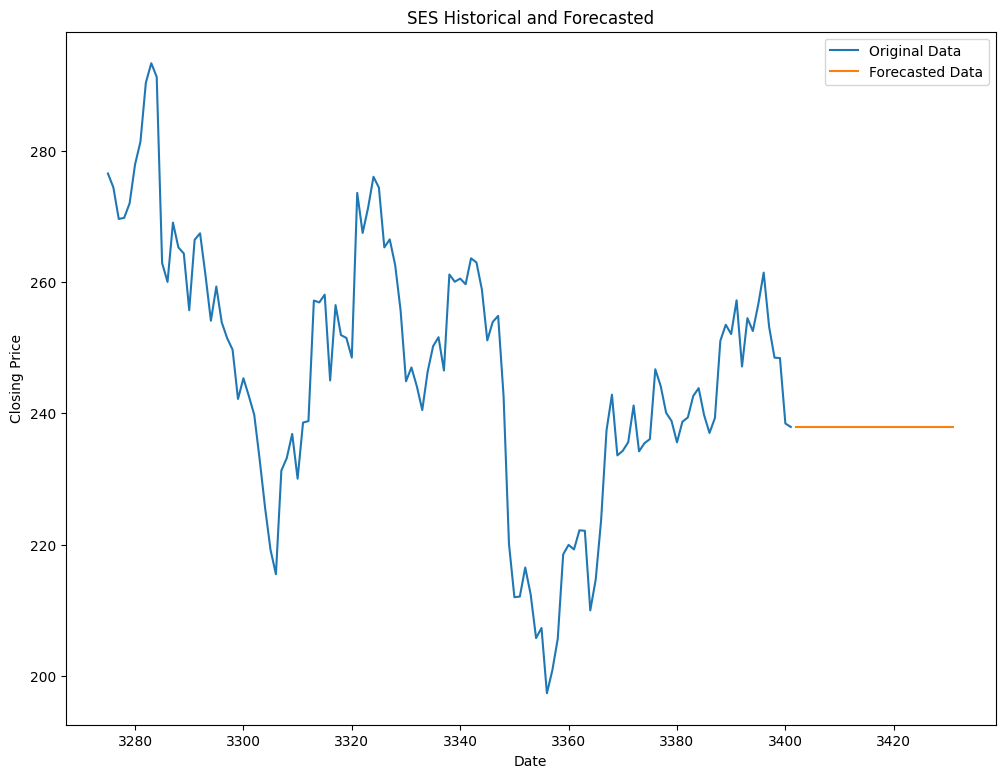

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Load dat
data = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data = data.drop(labels=range(0, len(data.index)-127), axis=0)
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
#data = data.set_index("Date", inplace=True)
df = data
#df.set_index('Date', inplace=True)

# Create a SimpleExpSmoothing model
model = SimpleExpSmoothing(df['Close'])

# Fit the model
fit = model.fit()

# Forecast the next 30 days
forecast = fit.forecast(30)

# Plot the original data and the forecasted data
plt.figure(figsize=(12,9))
plt.plot(df.index, df['Close'], label='Original Data')
plt.plot(forecast.index, forecast.values, label='Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title("SES Historical and Forecasted")
plt.legend()
plt.show()


In [64]:
data = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data = data.drop(labels=range(0, len(data.index)-127), axis=0)
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")

# Assuming 'Date' is not set as index (since you've commented that line)
df = data

# Create a SimpleExpSmoothing model
model = SimpleExpSmoothing(df['Close'])

# Fit the model
fit = model.fit()

# Forecast the next 30 days
forecast = fit.forecast(30)

# Preparing forecast DataFrame
forecast_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast.values})

# Plotting
actual_prices = go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Actual Price'
)

forecast_plot = go.Scatter(
    x=forecast_df['Date'],
    y=forecast_df['Forecast'],
    mode='lines',
    name='Forecast Price'
)

fig = go.Figure(data=[actual_prices, forecast_plot])

fig.update_layout(
    title='Simple Exponential Smoothing 30-Day Forecast using Tesla Stock',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    legend_title='Legend',
    height=800
)

fig.show()

#### Holt Winter's Exponential Smoothing 

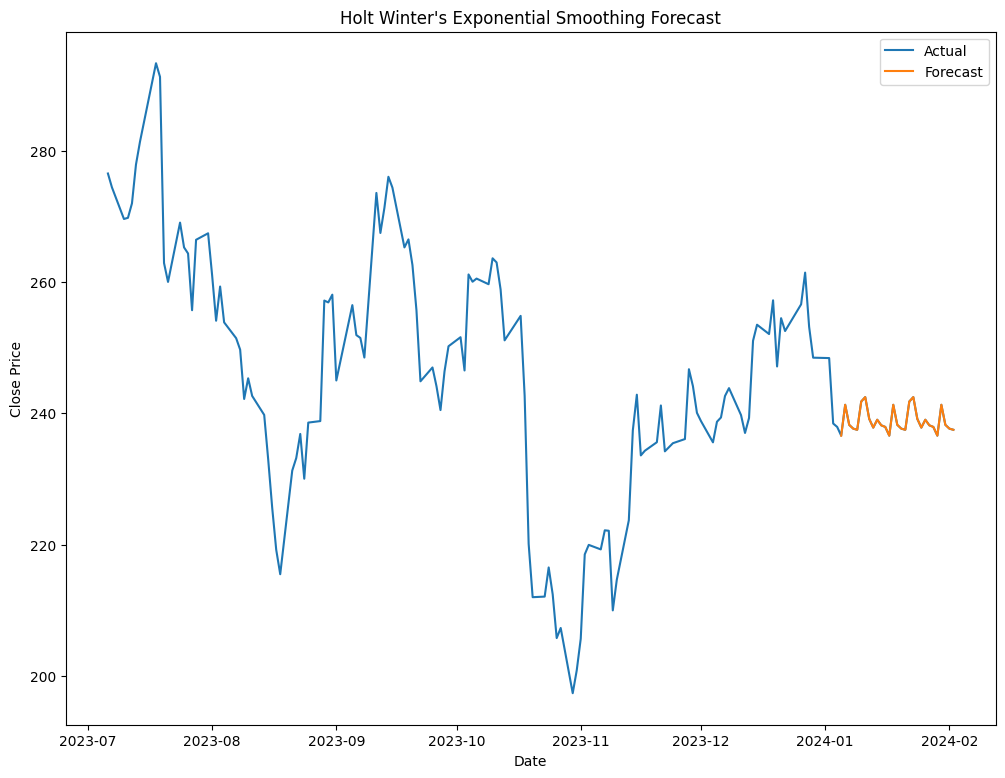

In [49]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
df = data.drop(labels=range(0, len(data.index)-127), axis=0)

model = ExponentialSmoothing(df["Close"], seasonal="add", seasonal_periods=12)

# fit the model
model_fit = model.fit()

# make predictions for the next 30 days
forecast = model_fit.forecast(29)

# add the forecast to the dataframe
last_date = df["Date"].iloc[-1]
date_range = pd.date_range(last_date, periods=30, freq="D")[1:]
forecast_df = pd.DataFrame({"Date": date_range, "Close": forecast})

df = pd.concat([df, forecast_df], ignore_index=True)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# plot the results
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(df["Date"], df["Close"], label="Actual")
ax.plot(forecast_df["Date"], forecast_df["Close"], label="Forecast")
ax.set_title("Holt Winter's Exponential Smoothing Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")
ax.legend()
plt.show()

In [65]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
import plotly.graph_objects as go

# Read in the data
data = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
df = data.drop(labels=range(0, len(data.index)-127), axis=0)

# Assuming 'Date' column is in your CSV and formatting it as datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# Holt-Winters model
model = ExponentialSmoothing(df["Close"], seasonal="add", seasonal_periods=12)

# Fit the model
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(29)

# Add the forecast to the dataframe
last_date = df["Date"].iloc[-1]
date_range = pd.date_range(last_date, periods=30, freq="D")[1:]
forecast_df = pd.DataFrame({"Date": date_range, "Close": forecast})

# Combine actual and forecasted data
combined_df = pd.concat([df, forecast_df], ignore_index=True)

# Plotting with Plotly
fig = go.Figure()

# Actual data plot
fig.add_trace(go.Scatter(x=combined_df["Date"], y=combined_df["Close"], mode='lines', name='Actual'))

# Forecast data plot
fig.add_trace(go.Scatter(x=forecast_df["Date"], y=forecast_df["Close"], mode='lines', name='Forecast'))

# Update layout without range slider
fig.update_layout(
    title="Holt Winter's Exponential Smoothing 30-Day Forecast using Tesla Stock",
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    height=800
)

fig.show()


# Actual 30 day aheads

In [ ]:
df_TSLA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA_comp.csv')#, index_col = 'Date')
df_TSLA_comp["Date"] = pd.to_datetime(df_TSLA_comp["Date"], format="%m/%d/%Y")
df_TSLA_comp.set_index("Date", inplace=True)
plt.figure(figsize = (12, 9))
plt.plot(df.index, df['Close']);
plt.plot(df_TSLA_comp.index,df_TSLA_comp['Close']);
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual TSLA stock prices 30 days')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load and prepare the data
data = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')
data = data.sort_values('Date')
data = data.drop(['Open', 'High', 'Low', 'Volume','Adj Close'], axis=1)

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Define the train and test data sets
train_data = data.iloc[:-30,:]
test_data = data.iloc[-30:,:]

# Create the training and testing sets
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10

X_train, y_train = create_dataset(train_data, train_data.Close, time_steps)
X_test, y_test = create_dataset(test_data, test_data.Close, time_steps)

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Transformer(input_shape=(time_steps, 1)),
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mae')

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = []
current_batch = X_test[0,:,:].reshape(1, time_steps, 1)

for i in range(len(X_test)):
    predicted = model.predict(current_batch)[0]
    predictions.append(predicted)
    current_batch = np.append(current_batch[:,1:,:],[[predicted]],axis=1)

# Plot the predicted values and the actual values
plt.plot(y_test, label='Actual Close')
plt.plot(predictions, label='Predicted Close')
plt.legend()
plt.show()

# Rescale the predicted values
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


In [11]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
# Load the data
df = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')

# Preprocess the data
scaler = MinMaxScaler()
df["Close"] = scaler.fit_transform(df[["Close"]])
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.dayofyear
df = df[["Day", "Close"]].values.astype(np.float32)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]
class StockDataset(Dataset):
    def __init__(self, data):
        self.data = data[:-1]  # Ignore the last row
        self.target = data[1:]  # Ignore the first row

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        return x, y

batch_size = 32
train_dataset = StockDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
class TransformerModel(nn.Module):
    def __init__(self, input_size, output_size, d_model, nhead, num_layers):
        super().__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead),
            num_layers=num_layers
        )
        self.decoder = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = x.transpose(0, 1)  # (seq_len, batch_size, input_size)
        x = self.encoder(x)
        x = x[-1, :, :]  # Only use the last hidden state
        x = self.decoder(x)
        return x

input_size = 1
output_size = 1
d_model = 128
nhead = 8
num_layers = 6
model = TransformerModel(input_size, output_size, d_model, nhead, num_layers)
learning_rate = 0.001
num_epochs = 100

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(x.unsqueeze(-1))
        loss = criterion(y_pred.squeeze(), y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
# Use the last 30 days of training data as input for forecasting
x_input = train_data[-30:, 1]
for i in range(30):
    x = torch.from_numpy(x_input).float().unsqueeze(0).unsqueeze(-1)
    y_pred = model(x)


AssertionError: was expecting embedding dimension of 128, but got 1

In [ ]:
pip install torch

In [ ]:
pip install transformer_model

In [ ]:
pip install TransformerModel

In [9]:
pip install transformers